In [1]:
# Assignment 1
# Question 1
# Xiaopeng Pan (1129446)
# Sep 20, 2020

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

In [3]:
# define the method to generate the halfmoon data
def generate_halfmoon_data(radius, width, distance, num_sample):
  data = []
  data_shuffled = []
  if radius < width/2:
    print('The radius should be at least larger than half the width.')
    return data,data_shuffled
  if num_sample % 2 !=0:
    print('Please make sure the number of samples is even.')
    return data,data_shuffled
  
  # generate a matrix with 2 rows and num_sample/2 columns, all elements belong to (0,1); 2 rows for 2 dimensions of each sample
  rand = np.random.rand(2,int(num_sample/2))
  # randomly generate radius for each sample, using the 1st row
  rand_radius = (radius-width/2)+width*rand[0]
  # randomly generate angle for each sample, using the 2nd row
  rand_theta = math.pi*rand[1]

  # generate features and labels for samples
  x1 = rand_radius*np.cos(rand_theta)
  y1 = rand_radius*np.sin(rand_theta)
  l1 = 1*np.ones((1,int(num_sample/2)))               # samples with "+1" labels
  x2 = rand_radius*np.cos((-1)*rand_theta)+radius
  y2 = rand_radius*np.sin((-1)*rand_theta)-distance
  l2 = (-1)*np.ones((1,int(num_sample/2)))            # samples with "-1" labels
  x = np.concatenate((x1,x2), axis=0)
  y = np.concatenate((y1,y2), axis=0)
  l = np.concatenate((l1,l2), axis=1)
  data = np.vstack([x, y])
  data = np.vstack([data, l])
  data_shuffled = shuffle_data(data)
  return data,data_shuffled

# method to shuffle a dataset
def shuffle_data(data_in):
  num_row = data_in.shape[0] # number of rows
  num_col = data_in.shape[1] # number of columns
  data_in_shuffled = np.zeros((num_row,num_col))
  index_col = list(range(num_col))
  # shuffle the column index
  random.shuffle(index_col)
  # generate shuffled data
  for _ in range(num_col):
    data_in_shuffled[:,_:_+1]=data_in[:,index_col[_]:index_col[_]+1]
  return data_in_shuffled

Perceptron for classification:
--------------------------------------------------
Generating halfmoon data ...
Points generated: 3000
Halfmoon radius : 10
Halfmoon width  : 6
Distance        : 0
Epochs          : 50
--------------------------------------------------
Halfmoon Data              :
 [[-4.76543227  3.73718689  5.96770265 ...  4.86331708 18.1091825
   2.16318231]
 [11.48115998 11.70905229  4.16775469 ... -6.82221486 -1.15830442
  -3.66534633]
 [ 1.          1.          1.         ... -1.         -1.
  -1.        ]]

Halfmoon Data (shuffled) :
 [[ -5.13262688  -0.79656226   9.41366652 ...  11.33605876   6.474839
    6.65377463]
 [  4.88113586  -3.41562261   2.92902132 ...  -9.82015082  11.14346332
  -10.37519125]
 [  1.          -1.           1.         ...  -1.           1.
   -1.        ]]
Dimensions of inputs : 2
Initial Bias         : 0.0
Learning Rate        : 0.4
Initial weights      :
 [[0.]
 [0.]
 [0.]]
Training the perceptron ...
-------------------------------------

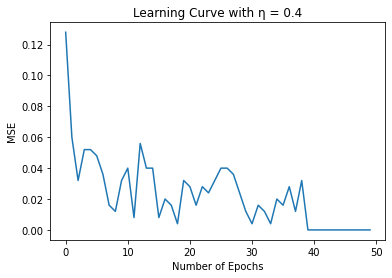

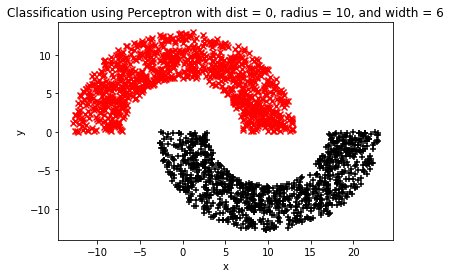

Mission Completed!
--------------------------------------------------
Points tested      : 2000
Error points       :0
Error percentage   : 0.00%


In [4]:
# ========================Step 0: Generating Halfmoon Data============================
ra = 10    # radius
wi = 6     # width
di = 0     # distance
num_tr = 1000      # number of training samples
num_te = 2000      # number of testing samples
num_sa = num_tr + num_te  # number of samples
num_ep = 50       # number of epochs
print('Perceptron for classification:')
print('--------------------------------------------------')
print('Generating halfmoon data ...')
print('Points generated:',num_sa)
print('Halfmoon radius :',ra)
print('Halfmoon width  :',wi)
print('Distance        :',di)
print('Epochs          :',num_ep)
print('--------------------------------------------------')

data,data_shuffled=generate_halfmoon_data(ra,wi,di,num_sa)
print("Halfmoon Data              :\n",data)
print("\nHalfmoon Data (shuffled) :\n",data_shuffled)

# ========================Step 1: Initialization of Perceptron Network============================
num_in = 2        # dimensions of the inputs
b = di/2          # bias
num_out_err = 0   # number f error outputs
eta = 0.4         # learning rate
w = np.vstack([np.array([b]),np.zeros((num_in,1))])     # initial weights
print("Dimensions of inputs :",num_in)
print("Initial Bias         :",b)
print("Learning Rate        :",eta)
print("Initial weights      :\n",w)

# ========================Step 2: Main Loop============================
st = time.time()    # time to start training
print("Training the perceptron ...")
print('--------------------------------------------------')

data_shuffled_tr=data_shuffled[:,:num_tr]                 # create data set for training
mse=np.zeros((1,num_ep))                                  # store the mse after each epoch
for ep in range(num_ep):
  # for each epoch, shuffle the data for a new training batch
  data_tr = shuffle_data(data_shuffled_tr)
  ee=np.zeros((1,num_tr))                                 # store the error between the output and desired
  for _ in range(num_tr):
    x = np.vstack([np.array([1]),data_tr[:2,_:_+1]])      # fetching features x and y of training sample _
    d = data_tr[2:,_:_+1]                                 # fetching desired output of training sample _
    if np.dot(w.T,x)>=0:                                  # the sign function
      y = 1
    else:
      y = -1
    ee[:,_:_+1]=d-y 
    # ========================Step 3: Update Weights============================
    w_new = w + eta*(d-y)*x                               # update weights  
    w = w_new
  mse[:,ep:ep+1] = np.mean(np.power(ee,2))                # calculate the mse of the epoch
print("Points trained     :",num_tr)
print("Time cost          :",time.time()-st)
print("Updated Bias       :",w.item((0,0)))
print("Updated weights    :\n",w)
print("MSE                :\n",mse)
print('--------------------------------------------------')

# ========================Step 4: Plotting Learning Curve============================
x = []
y = []
for _ in range(num_ep):
  x.append(_)                   # the serial number of the epoch
  y.append(mse.item((0,_)))     # the mse of the epoch

plt.title("Learning Curve with η = %1.1f"%(eta)) 
plt.xlabel("Number of Epochs") 
plt.ylabel("MSE") 
plt.plot(x,y) 
plt.show()

# ========================Step 5: Testing============================
# generate a list to store the prediction of testing output
pre_out = []    # store the prediction
data_shuffled_te=data_shuffled[:,num_tr:num_sa]                   # create data set for testing
for _ in range(num_te):
    x = np.vstack([np.array([1]),data_shuffled_te[:2,_:_+1]])     # fetching features x and y of testing sample
    if np.dot(w.T,x)>=0:
      pre_out.append(1)
    else:
      pre_out.append(-1)

num_p = 0   # number of +1 output
num_n = 0   # number of -1 output
for _ in range(num_te):
  if pre_out[_]==1:
    num_p=num_p+1                 # the number of "+1" outputs
  elif pre_out[_]==-1:
    num_n=num_n+1
out_p = np.zeros((2,num_p))       # to store the features of samples that have "+1" outputs
out_n = np.zeros((2,num_n))

index_out_p = 0
index_out_n = 0
for _ in range(num_te):
    x = np.vstack([np.array([1]),data_shuffled_te[:2,_:_+1]])     
    if np.dot(w.T,x)>=0:
      out_p[:,index_out_p:index_out_p+1] = data_shuffled_te[:2,_:_+1]     # add the sample into the "+1" output array
      index_out_p=index_out_p+1
    else:
      out_n[:,index_out_n:index_out_n+1] = data_shuffled_te[:2,_:_+1]     # add the sample into the "-1" output array
      index_out_n=index_out_n+1

# ========================Step 6: Plotting Testing Result============================
plt.scatter(out_p[:1,:], out_p[1:2,:], color="r", marker="x")
plt.scatter(out_n[:1,:], out_n[1:2,:], color="k", marker="+")
plt.title('Classification using Perceptron with dist = %d, radius = %d, and width = %d'%(di,ra,wi))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Mission Completed!")

for _ in range(num_te):
  if abs(pre_out[_]-data_shuffled[2:3,_+num_tr:_+num_tr+1])>1E-6:
    num_out_err=num_out_err+1
print('--------------------------------------------------')
print("Points tested      :",num_te)
print('Error points       :%d'%(num_out_err))
print('Error percentage   :%5.2f'%((num_out_err/num_te)*100)+'%')